In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

### Loading the dataset

In [2]:
df = pd.read_csv('wine.csv')

In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Scaling the data

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaled_data = scaler.fit_transform(df)

In [7]:
scaled_data

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]], shape=(178, 14))

In [8]:
scaled_df = pd.DataFrame(data=scaled_data, columns= df.columns)

In [9]:
scaled_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### Clustering without PCA

#### Identify the value of K

In [10]:
from sklearn.cluster import KMeans

In [11]:
wcss = []
for k in range(1,51):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

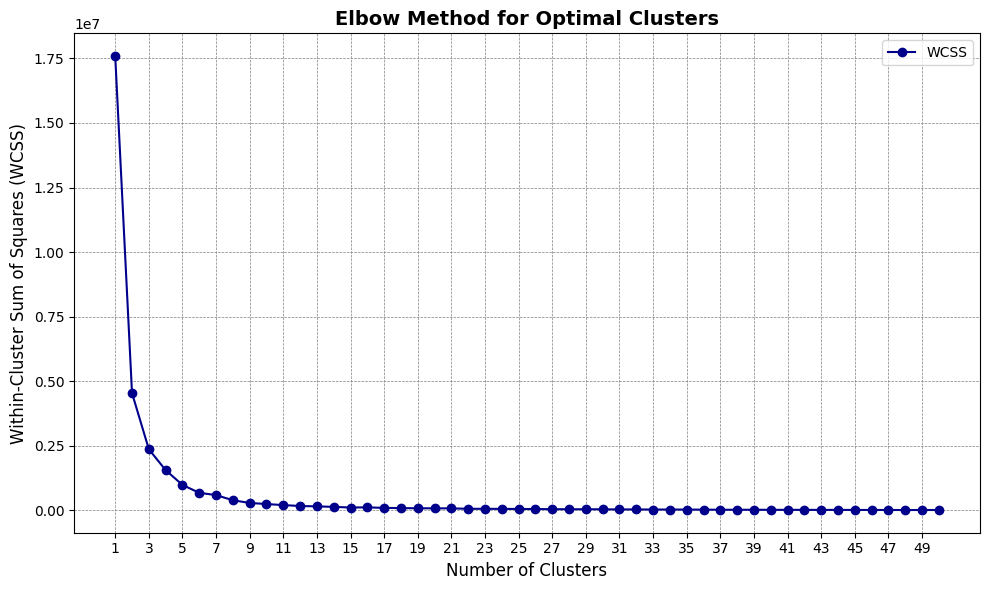

In [12]:
# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(wcss) + 1), wcss, marker='o', linestyle='-', color='darkblue', label='WCSS')

# Adding titles and labels
plt.title("Elbow Method for Optimal Clusters", fontsize=14, fontweight='bold')
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Within-Cluster Sum of Squares (WCSS)", fontsize=12)

# Customizing ticks and grid
plt.xticks(range(1, len(wcss) + 1, 2), fontsize=10)
plt.yticks(fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Adding a legend
plt.legend(loc='upper right', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

- after 5 it is kind of normalizing

#### Automated way

In [13]:
from kneed import KneeLocator

In [14]:
kl = KneeLocator(range(1,51),wcss,curve='convex',direction='decreasing')

In [15]:
kl.elbow

np.int64(5)

- So we will train our model to divide the data into 5 clusters

### Model Training

In [16]:
model = KMeans(n_clusters= 5, init='k-means++')

In [17]:
model.fit(scaled_df)

KMeans(n_clusters=5)

In [18]:
pred_clusters = model.predict(scaled_df)

In [19]:
pred_clusters

array([4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 1,
       1, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 0, 1, 1, 3, 3,
       1, 3, 0, 1, 0, 3, 3, 4, 1, 3, 1, 3, 1, 3, 3, 1, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 4, 0, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [20]:
scaled_df['Cluster'] = pred_clusters

In [21]:
scaled_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,4
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,4
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,4
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,4


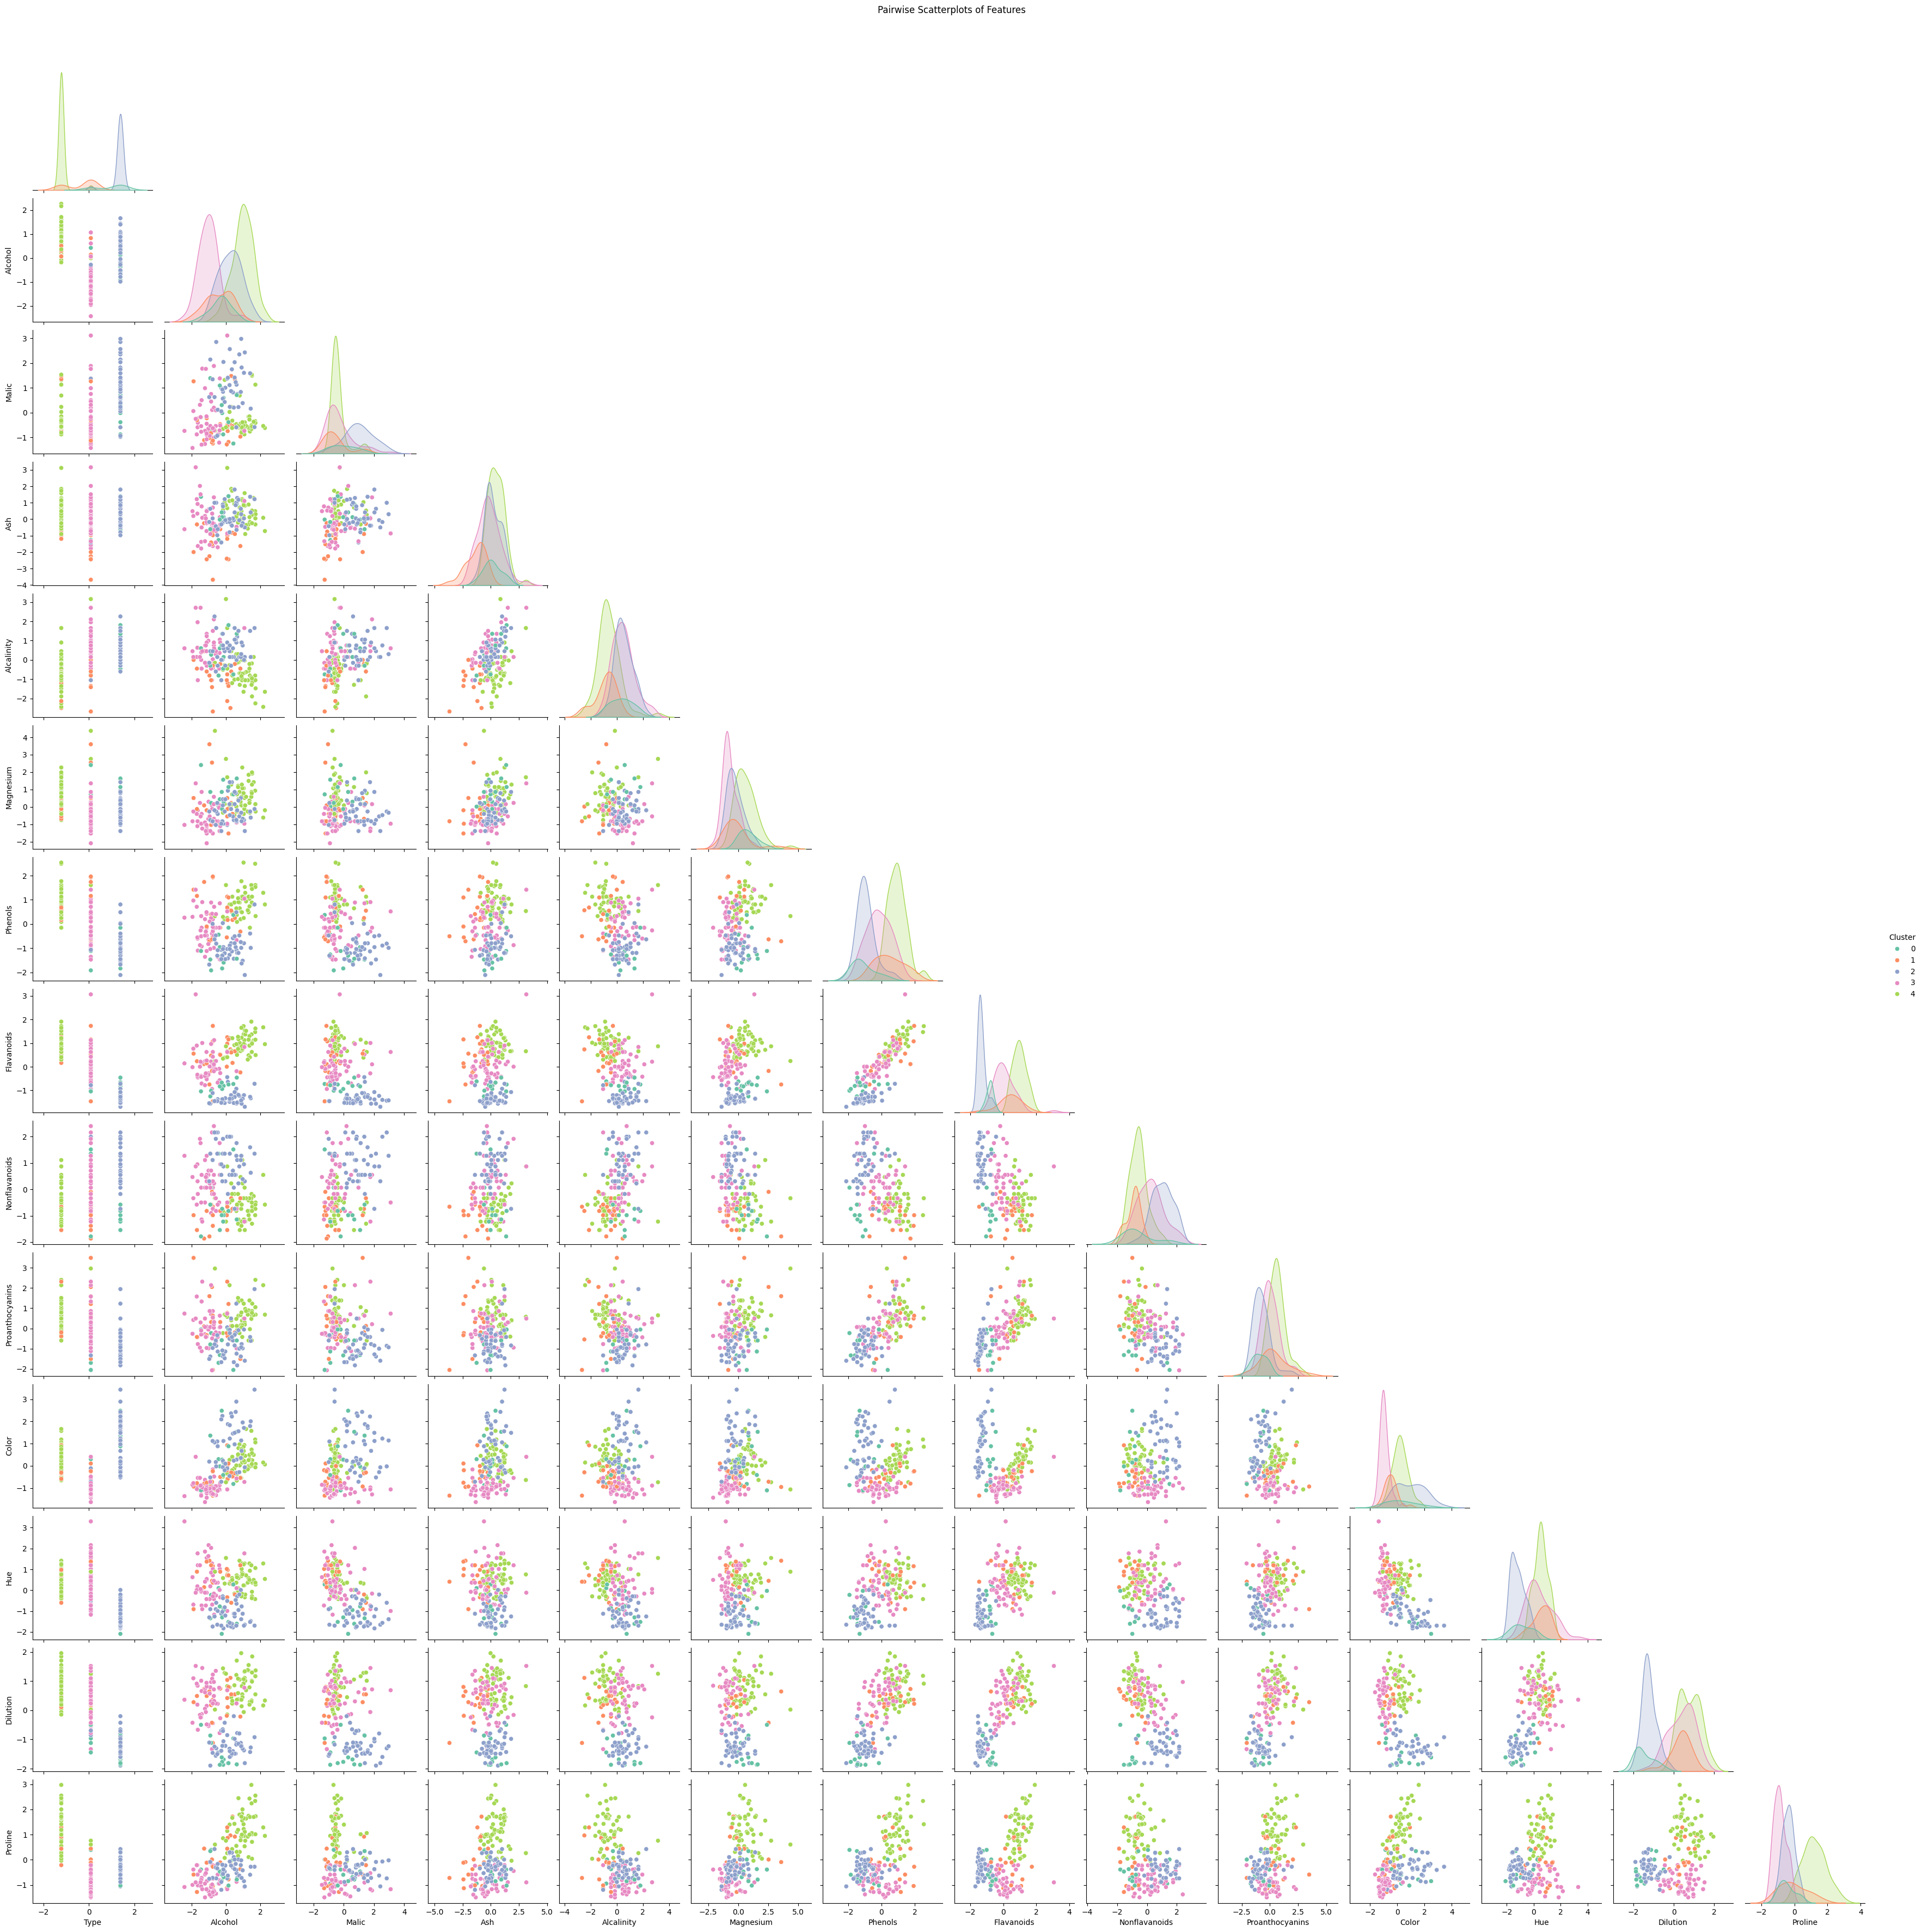

In [22]:
# Pairplot to visualize relationships between features
sns.pairplot(scaled_df, hue='Cluster', palette='Set2', diag_kind='kde', corner=True)
plt.suptitle('Pairwise Scatterplots of Features', y=1.02)
plt.show()

### Evaluation

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
silhouette_score(scaled_df,pred_clusters)

np.float64(0.2887500073840368)

### Clustering using PCA

In [26]:
from sklearn.decomposition import PCA

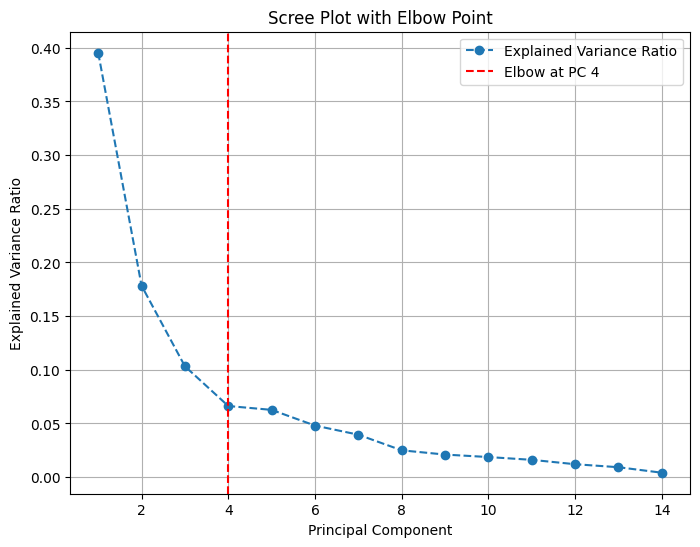

Optimal number of components: 4


In [ ]:
pca = PCA()
pca.fit(scaled_data)

explained_variance = pca.explained_variance_ratio_

knee_locator = KneeLocator(range(1, len(explained_variance) + 1), explained_variance, curve="convex", direction="decreasing")
elbow_point = knee_locator.knee

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label='Explained Variance Ratio')
plt.axvline(x=elbow_point, color='r', linestyle='--', label=f'Elbow at PC {elbow_point}')
plt.title('Scree Plot with Elbow Point')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid()
plt.show()

print(f"Optimal number of components: {elbow_point}")

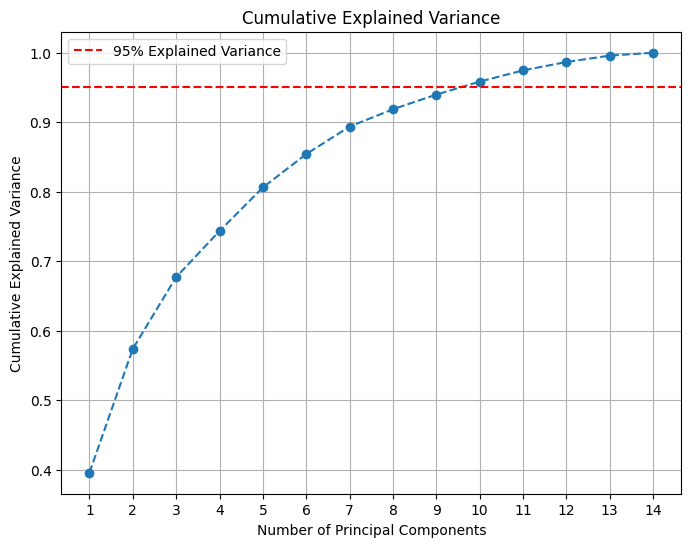

Optimal number of components for 95% variance: 10


In [28]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend()
plt.show()

optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components for 95% variance: {optimal_components}")


- The Scree plot suggests 4 components as optimal for pca where as the cumulative explained variance suggests it to be 10

---

- So we will be using (4 + 10) // 2 = 7 as optimal components for pca

In [30]:
pca = PCA(n_components=7)

In [31]:
pca

PCA(n_components=7)

In [32]:
pca_scaled = pca.fit_transform(scaled_data)

In [33]:
pca_scaled

array([[-3.5229339 ,  1.45309844, -0.16479549, ...,  0.73734536,
         0.30071618,  0.57387557],
       [-2.52885806, -0.33001925, -2.02670665, ..., -0.28321373,
         0.88430941, -0.02971648],
       [-2.78502898,  1.03693595,  0.9832377 , ..., -0.38756497,
        -0.46884161,  0.4883054 ],
       ...,
       [ 3.02727243,  2.75604024, -0.94080304, ...,  1.12813634,
        -0.00529036,  0.73302611],
       [ 2.75522166,  2.29378408, -0.55047368, ...,  1.06708304,
        -1.01256231,  0.75542325],
       [ 3.49633565,  2.76060799,  1.01315115, ..., -1.00513627,
        -0.37722337,  0.01530664]], shape=(178, 7))

In [35]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6'],
      dtype=object)

In [36]:
pca_scaled_df = pd.DataFrame(data=pca_scaled,columns= pca.get_feature_names_out())

In [37]:
pca_scaled_df

,pca0,pca1,pca2,pca3,pca4,pca5,pca6
0,-3.522934,1.453098,-0.164795,-0.013273,0.737345,0.300716,0.573876
1,-2.528858,-0.330019,-2.026707,-0.417144,-0.283214,0.884309,-0.029716
2,-2.785029,1.036936,0.983238,0.664232,-0.387565,-0.468842,0.488305
3,-3.922588,2.768210,-0.174968,0.565088,-0.324360,-0.262616,-0.398364
4,-1.407511,0.867773,2.025829,-0.440906,0.227949,0.593762,0.447876
...,...,...,...,...,...,...,...
173,3.627996,2.206617,-0.343668,0.751705,-1.004109,1.143155,0.843455
174,2.942729,1.752263,0.207480,0.399381,0.154223,0.062465,0.139947
175,3.027272,2.756040,-0.940803,0.607758,1.128136,-0.005290,0.733026
176,2.755222,2.293784,-0.550474,-0.391570,1.067083,-1.012562,0.755423


#### Identify the value of K

In [38]:
wcss = []
for k in range(1,51):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

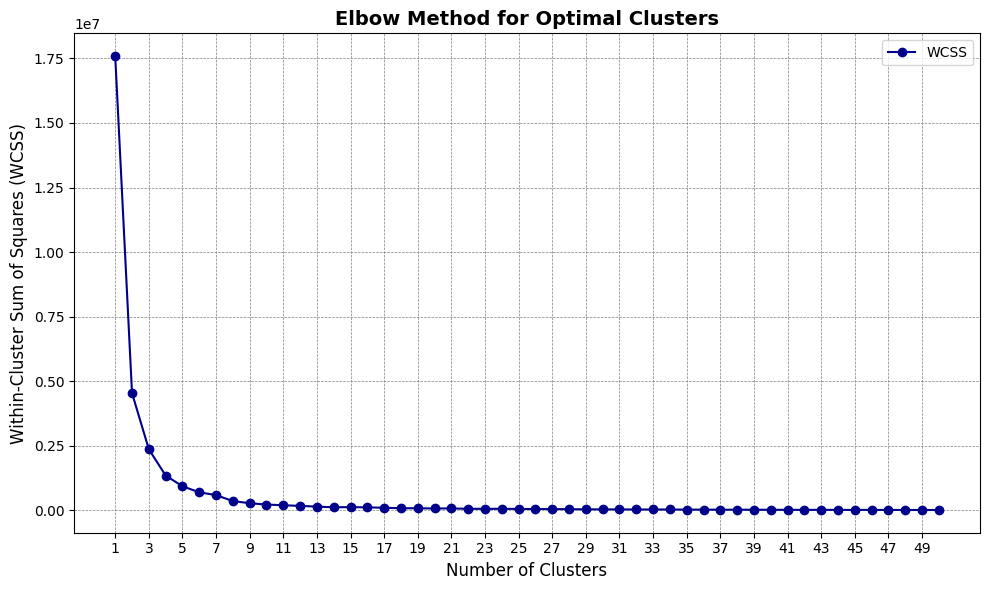

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(wcss) + 1), wcss, marker='o', linestyle='-', color='darkblue', label='WCSS')

# Adding titles and labels
plt.title("Elbow Method for Optimal Clusters", fontsize=14, fontweight='bold')
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Within-Cluster Sum of Squares (WCSS)", fontsize=12)

# Customizing ticks and grid
plt.xticks(range(1, len(wcss) + 1, 2), fontsize=10)
plt.yticks(fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Adding a legend
plt.legend(loc='upper right', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

- it is normalizing after 5

#### Automated way

In [40]:
kl = KneeLocator(range(1,51),wcss,curve='convex',direction='decreasing')

In [41]:
kl.elbow

np.int64(5)

- So we will train our model to divide the data into 5 clusters

In [43]:
model = KMeans(n_clusters= 5, init='k-means++')

In [44]:
model.fit(pca_scaled_df)

KMeans(n_clusters=5)

- we will be using 5 clusters for dividing the data

In [45]:
pred_clusters = model.predict(pca_scaled_df)

In [46]:
pred_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 1, 3,
       3, 1, 1, 3, 1, 3, 1, 0, 3, 1, 1, 1, 3, 3, 1, 3, 1, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 0, 1, 3, 3, 3, 1, 1, 3, 1, 3, 4, 1, 1, 3, 3,
       3, 3, 4, 1, 1, 1, 1, 1, 4, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 4, 2, 2,
       2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [47]:
pca_scaled_df['Cluster'] = pred_clusters

In [48]:
pca_scaled_df.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,Cluster
0,-3.522934,1.453098,-0.164795,-0.013273,0.737345,0.300716,0.573876,0
1,-2.528858,-0.330019,-2.026707,-0.417144,-0.283214,0.884309,-0.029716,0
2,-2.785029,1.036936,0.983238,0.664232,-0.387565,-0.468842,0.488305,0
3,-3.922588,2.768210,-0.174968,0.565088,-0.324360,-0.262616,-0.398364,0
4,-1.407511,0.867773,2.025829,-0.440906,0.227949,0.593762,0.447876,0


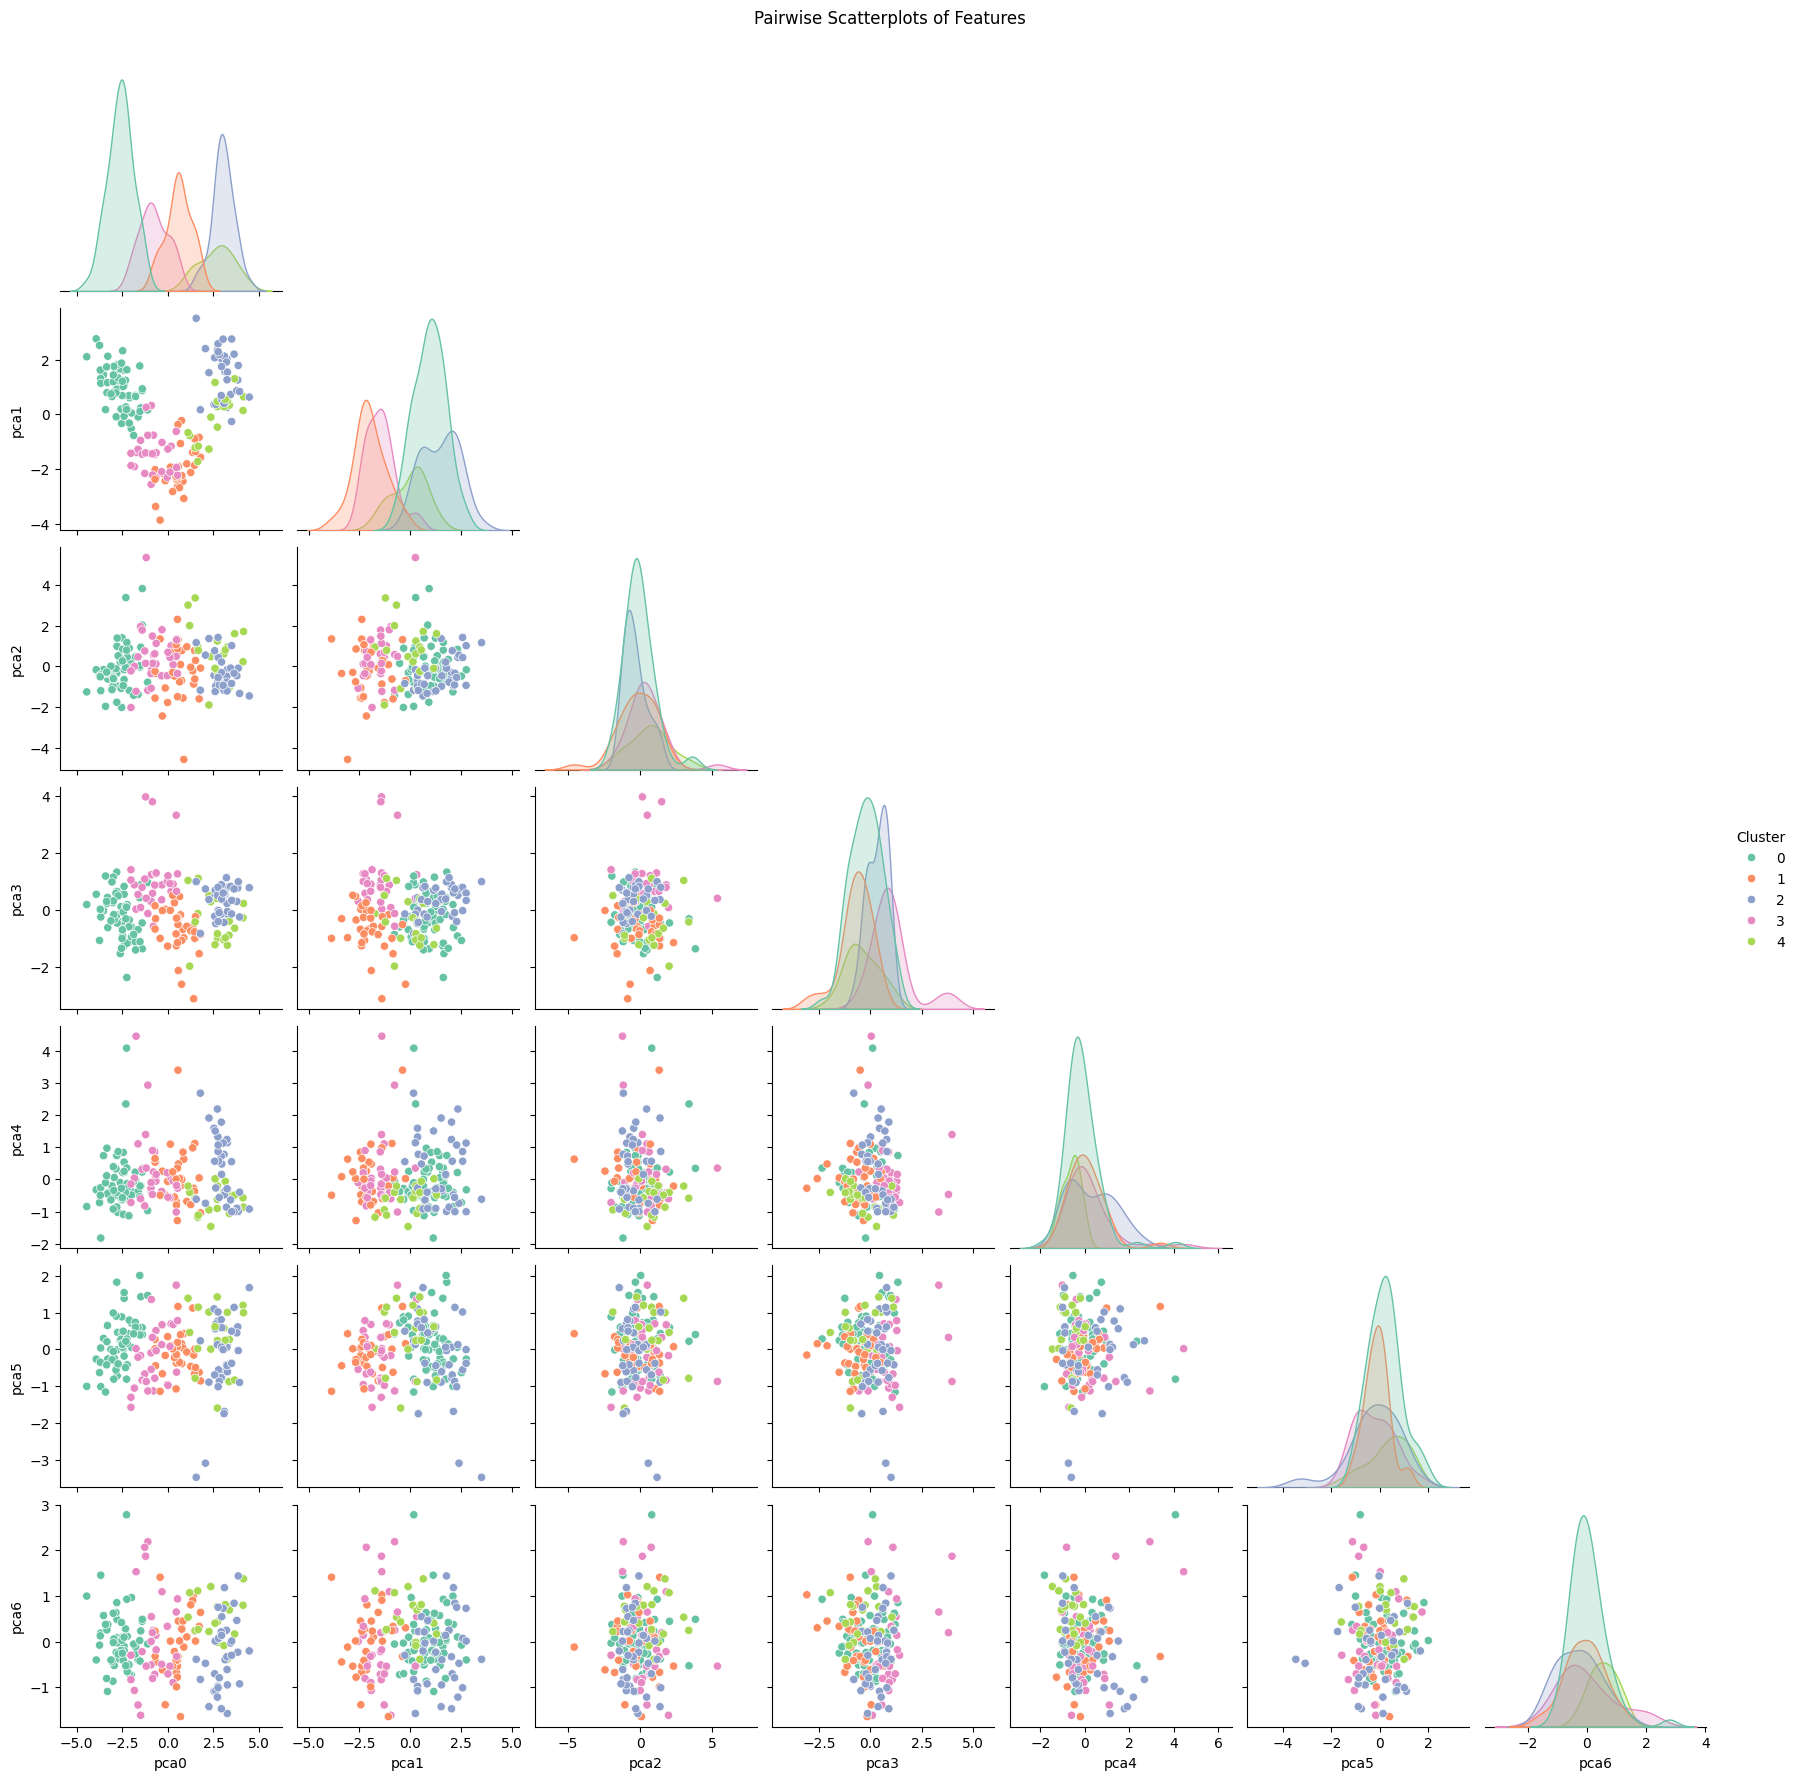

In [49]:
# Pairplot to visualize relationships between features
sns.pairplot(pca_scaled_df, hue='Cluster', palette='Set2', diag_kind='kde', corner=True)
plt.suptitle('Pairwise Scatterplots of Features', y=1.02)
plt.show()

### Evaluation

In [50]:
silhouette_score(pca_scaled_df,pred_clusters)

np.float64(0.3421257389780921)

---
## Comparison and Analysis

### 1. Compare the clustering results
- **Silhouette Scores**:
  - Without PCA: 0.29
  - With PCA: 0.34
- **Visualization**:
  - PCA-transformed data shows more compact and separable clusters.
  - Original dataset has overlapping clusters due to noise and redundancy.

### 2. Similarities and differences
- **Similarities**:
  - Both approaches identify clusters with similar relative densities.
  - General grouping trends are consistent.
- **Differences**:
  - PCA clusters are more distinct and compact.
  - Without PCA, clusters are more dispersed and influenced by noise.

### 3. Impact of dimensionality reduction
- PCA simplifies clustering by reducing noise and redundant dimensions.
- Improved silhouette score indicates better-defined clusters with PCA.

### 4. Trade-offs between PCA and original dataset
- **Advantages of PCA**:
  - Reduces computational complexity.
  - Mitigates noise and redundancy.
  - Enhances interpretability and visualization.
- **Disadvantages of PCA**:
  - Loss of some information during dimensionality reduction.
  - Additional computation required for transformation.
- **Advantages of Original Dataset**:
  - Retains all original information.
  - Avoids biases introduced by PCA.
- **Disadvantages of Original Dataset**:
  - Higher computational cost.
  - Noise and redundant features degrade clustering quality.

---

## Conclusion and Insights

### 1. Key findings and insights
- PCA improves clustering performance (higher silhouette score).
- Dimensionality reduction enhances cluster separability.
- PCA reduces noise but may result in some information loss.

### 2. Practical implications
- PCA is effective for high-dimensional and correlated datasets.
- PCA enhances clustering efficiency and aids in visualization.

### 3. Recommendations
- **Use PCA**:
  - For datasets with many features or high dimensionality.
  - For noise-prone data or when visualization is needed.
  - When computational efficiency is important.
- **Use Original Dataset**:
  - When preserving all information is critical.
  - For datasets with low dimensionality and minimal noise.

---
